In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('/content/House_Rent_Dataset.csv')

In [ ]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
data.shape

(4746, 12)

In [ ]:
len(data['BHK'].unique())

6

In [ ]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
data.dtypes=='object'

Posted On             True
BHK                  False
Rent                 False
Size                 False
Floor                 True
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool

In [ ]:
le=LabelEncoder()

In [ ]:
mx=MinMaxScaler()

In [ ]:
data['Area Locality'] = le.fit_transform(data['Area Locality'])

In [ ]:
data['Area Type'] = le.fit_transform(data['Area Type'])

In [ ]:
data['Floor'] = le.fit_transform(data['Floor'])

In [ ]:
data['Posted On'] = le.fit_transform(data['Area Locality'])

In [ ]:
data['City'] = le.fit_transform(data['City'])

In [ ]:
data['Furnishing Status'] = le.fit_transform(data['Furnishing Status'])

In [ ]:
data['Tenant Preferred'] = le.fit_transform(data['Tenant Preferred'])

In [ ]:
data['Point of Contact'] = le.fit_transform(data['Point of Contact'])

In [ ]:
data_norm=pd.DataFrame(mx.fit_transform(data))

In [ ]:
data_norm.columns=data.columns

In [ ]:
data_norm.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,0.098926,0.2,0.002515,0.136421,0.949896,1.0,0.098926,0.8,1.0,0.5,0.111111,1.0
1,0.683527,0.2,0.005373,0.098874,0.029228,1.0,0.683527,0.8,0.5,0.5,0.000000,1.0
2,0.787825,0.2,0.004516,0.123905,0.029228,1.0,0.787825,0.8,0.5,0.5,0.000000,1.0
3,0.235452,0.2,0.002515,0.098874,0.020877,1.0,0.235452,0.8,1.0,0.5,0.000000,1.0
4,0.846016,0.2,0.001801,0.105131,0.020877,0.5,0.846016,0.8,1.0,0.0,0.000000,1.0


In [140]:
data_norm.corr()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,1.000000,0.016211,-0.018849,-0.006800,-0.021142,-0.007743,1.000000,-0.042836,0.015144,-0.030848,0.010241,0.000294
BHK,0.016211,1.000000,0.369718,0.716145,-0.005432,-0.153225,0.016211,0.046914,-0.140264,0.041534,0.794885,-0.230954
Rent,-0.018849,0.369718,1.000000,0.413551,0.024250,-0.214867,-0.018849,0.210525,-0.146251,0.006027,0.441215,-0.339677
Size,-0.006800,0.716145,0.413551,1.000000,0.007967,-0.079705,-0.006800,-0.049831,-0.172783,0.031500,0.740703,-0.214327
Floor,-0.021142,-0.005432,0.024250,0.007967,1.000000,-0.020014,-0.021142,0.098340,-0.014131,0.016247,-0.003751,-0.025098
Area Type,-0.007743,-0.153225,-0.214867,-0.079705,-0.020014,1.000000,-0.007743,-0.282856,0.056276,0.155388,-0.183012,0.559451
Area Locality,1.000000,0.016211,-0.018849,-0.006800,-0.021142,-0.007743,1.000000,-0.042836,0.015144,-0.030848,0.010241,0.000294
City,-0.042836,0.046914,0.210525,-0.049831,0.098340,-0.282856,-0.042836,1.000000,0.002633,0.041769,0.108257,-0.357165
Furnishing Status,0.015144,-0.140264,-0.146251,-0.172783,-0.014131,0.056276,0.015144,0.002633,1.000000,-0.092878,-0.181425,0.131276
Tenant Preferred,-0.030848,0.041534,0.006027,0.031500,0.016247,0.155388,-0.030848,0.041769,-0.092878,1.000000,0.056894,0.063182


<Axes: >

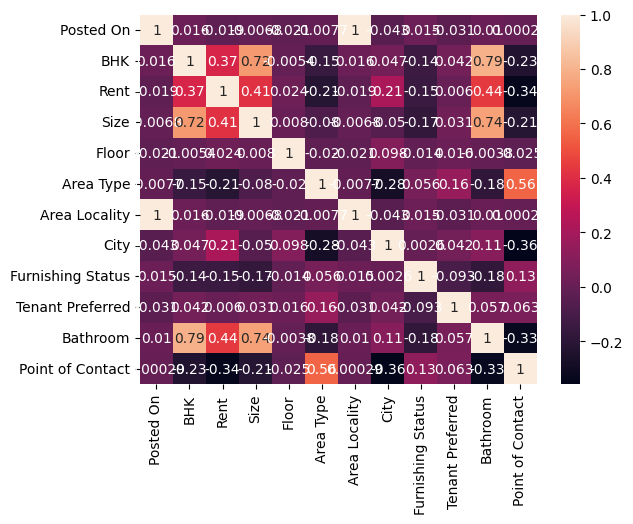

In [141]:
sns.heatmap(data_norm.corr(),annot=True)

<Axes: xlabel='BHK', ylabel='Size'>

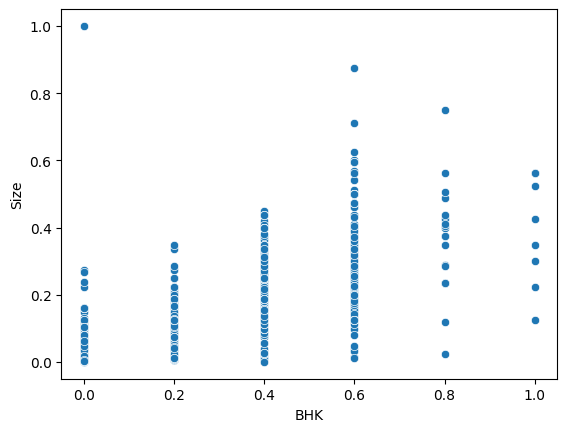

In [142]:
sns.scatterplot(data=data_norm, x="BHK", y="Size")

In [143]:
data=data_norm.drop('Size',axis=1)

In [144]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [145]:
outliers = find_outliers_IQR(data['Rent'])

In [146]:
outliers

104     0.051103
525     0.019664
527     0.021093
530     0.045387
531     0.085401
          ...   
4523    0.019664
4543    0.056819
4648    0.022522
4669    0.039671
4716    0.031096
Name: Rent, Length: 520, dtype: float64

<Axes: xlabel='Rent'>

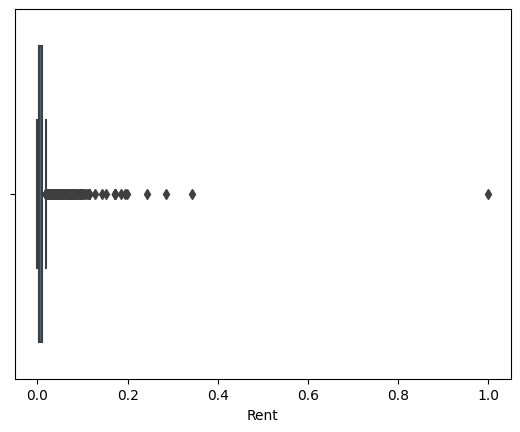

In [147]:
sns.boxplot(x=data['Rent'])

In [148]:
data['Rent']

0       0.002515
1       0.005373
2       0.004516
3       0.002515
4       0.001801
          ...   
4741    0.003944
4742    0.007946
4743    0.009660
4744    0.012519
4745    0.003944
Name: Rent, Length: 4746, dtype: float64

In [154]:
def func(x):
    if 0 < x <= 0.65:
        return 0
    else:
        return 1

In [155]:
data['Rent'] = data['Rent'].apply(func)

In [157]:
Y=data['Rent']

In [158]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
4741    0
4742    0
4743    0
4744    0
4745    0
Name: Rent, Length: 4746, dtype: int64

In [159]:
data['Rent'].value_counts().sort_index()

0    4744
1       2
Name: Rent, dtype: int64

In [160]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.2, random_state=4)

In [161]:
X_train.shape

(3796, 10)

In [162]:
X_test.shape

(950, 10)

In [163]:
Y_train

1978    0
3513    0
3216    0
3892    0
4738    0
       ..
3671    0
709     0
2487    0
174     0
1146    0
Name: Rent, Length: 3796, dtype: int64

In [164]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score
print('Accuracy : ',accuracy_score(Y_test,y_pred))

Accuracy :  0.9989473684210526


In [167]:
xgb_reg = xgb.XGBClassifier()
xgb_reg.fit(X_train, Y_train)
y_pred = xgb_reg.predict(X_test)

In [168]:
print('Accuracy : ',accuracy_score(Y_test,y_pred))

Accuracy :  0.9989473684210526


In [169]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [170]:
Y_test

1015    0
3772    0
3281    0
461     0
4599    0
       ..
4612    0
3455    0
3371    0
2992    0
374     0
Name: Rent, Length: 950, dtype: int64

In [178]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [180]:
print('Mean squared error:', mean_squared_error(Y_test, y_pred))

Mean squared error: 0.0010526315789473684


In [181]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 1, 5], 'objective': ['reg:squarederror'],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [182]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'objective': 'reg:squarederror', 'subsample': 0.7}
Best score: 0.0002631578947368421


In [183]:
xgb_reg = xgb.XGBClassifier(learning_rate=0.3,max_depth=7,n_estimators=200)

In [184]:
params = {
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    
}

In [185]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9978947368421053


In [186]:
print('Mean squared error:', mean_squared_error(Y_test, y_pred))

Mean squared error: 0.002105263157894737


In [187]:
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=7,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 1, 5], 'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [188]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.7, 'gamma': 0, 'subsample': 0.7}
Best score: -0.0002631578947368421


In [189]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9989473684210526


In [190]:
from sklearn import tree

In [191]:
clf = tree.DecisionTreeClassifier()

In [192]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [193]:
y_pred = clf.predict(X_test)

In [194]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9978947368421053


In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
clf = RandomForestClassifier()

In [197]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [198]:
y_pred = clf.predict(X_test)

In [199]:
print('Accuracy:', accuracy_score(Y_test, y_pred))

Accuracy: 0.9989473684210526


In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

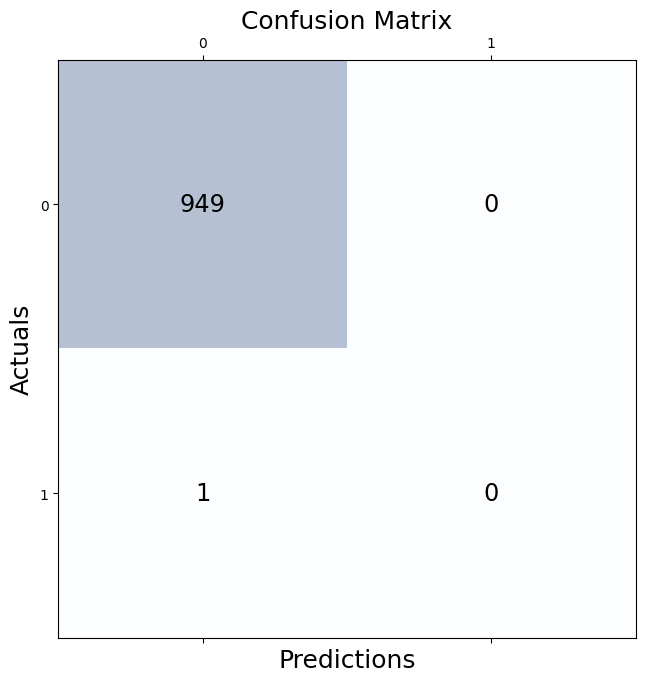

In [201]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

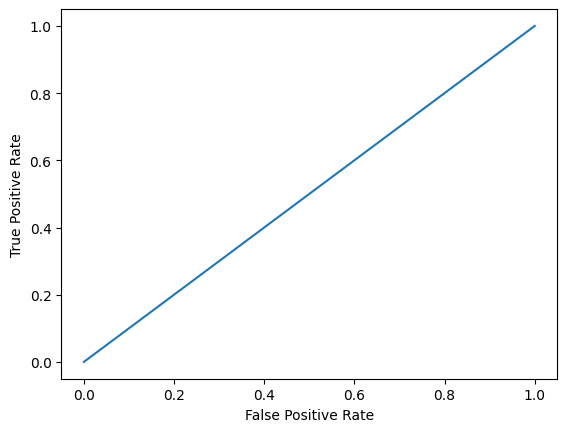

In [202]:
fpr, tpr, _ = roc_curve(Y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [203]:
from sklearn.metrics import roc_auc_score

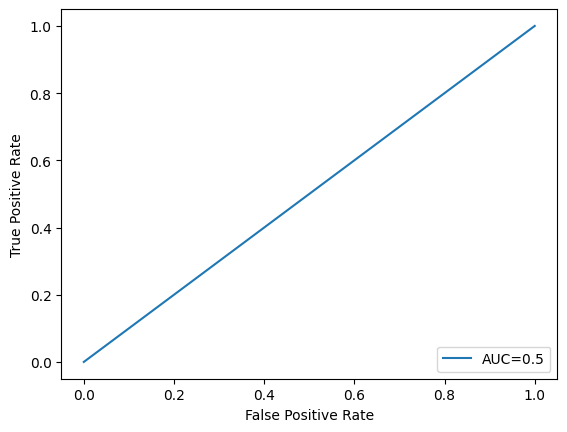

In [204]:
auc = roc_auc_score(Y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()